In [1]:
import pandas as pd
import numpy as np
import re, os, math, copy

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
print(tf.__version__)

import matplotlib.pyplot as plt
%matplotlib inline


2.6.0


In [4]:
df_pca = pd.read_csv('DNN_pca.csv')
# print(df_pca.head())
feature_cols_pcs = [str(i) for i in range(0,10)]
targrt_column_list= ['epochs_times_one', 'epochs_times_avg', 'fit_time']
X_pca = df_pca[feature_cols_pcs] # Features
y_pca = df_pca[targrt_column_list[1]] # Target variable
yf_pca = df_pca[targrt_column_list[2]]

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=1) 

Xf_train_pca, Xf_test_pca, yf_train_pca, yf_test_pca = train_test_split(X_pca, yf_pca, test_size=0.3, random_state=1) 

linear_regress_pca = LinearRegression()
linear_regress_pca.fit(X_train_pca,y_train_pca)
y_pred_pca = linear_regress_pca.predict(X_test_pca)

res_val_pca = []
for p, a in zip(y_pred_pca, y_test_pca):
    res_val_pca.append([p, a])
res_pca = pd.DataFrame(res_val_pca, columns=["predic", "actual"])
print(res_pca.head())
print("Mean Squared Error:", mean_squared_error(y_test_pca, y_pred_pca))
print("Mean Absolute Error:", mean_absolute_error(y_test_pca, y_pred_pca))



       predic   actual
0  468.482486  122.450
1  124.534915  212.330
2  365.010586  265.310
3  239.942655   43.225
4  116.384835   58.290
Mean Squared Error: 49435.171930004915
Mean Absolute Error: 131.31041188826168


In [15]:
linear_regress_pca = LinearRegression()
linear_regress_pca.fit(Xf_train_pca,yf_train_pca)
y_pred_pca = linear_regress_pca.predict(Xf_test_pca)

res_val_pca = []
for p, a in zip(y_pred_pca, yf_test_pca):
    res_val_pca.append([p, a])
res_pca = pd.DataFrame(res_val_pca, columns=["predic", "actual"])
print(res_pca.head())
print("Mean Squared Error:", mean_squared_error(yf_test_pca, y_pred_pca))
print("Mean Absolute Error:", mean_absolute_error(yf_test_pca, y_pred_pca))

for p in (y_pred_pca):
    if p <=0 :
        print(p)

       predic  actual
0  673.982710  124.96
1  142.931827  213.59
2  586.655065  531.48
3  404.958963   87.47
4  208.531581  116.84
Mean Squared Error: 140830.95178998512
Mean Absolute Error: 208.4649604764451
-27.203618164338934
-40.4282984866158
-8.140511121173034
-119.86286976394524
-124.84764452690774
-84.12109260835746
-26.53891587951884
-126.11542004566888
-254.0470843172817
-121.97642453022195
-82.58041410984481
-142.92522529890374
-106.39338961059747
-165.03632696666654
-116.55670036454802
-177.82594821923857
-231.22246825454124
-266.59614634143725
-22.63573137511665
-277.5495857631925
-170.7480407520507
-215.68043852006764
-82.45086793149943
-200.15930135513133
-22.63573137511665
-18.866694881748515
-110.75602191999832
-194.63575347247337
-202.76074048087418
-367.1146042375912
-185.86084514909368
-142.9252954339899
-289.86540561061014
-105.07073499807467
-45.723501987742225
-381.8907774296716
-1.2072603176383154
-399.5502295275534
-57.51600553477755
-267.3909666936373
-238.980

In [7]:
# X_train_pca, X_test_pca, y_train_pca, y_test_pca
# NN Model with one dimention
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=X_train_pca.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=opt, metrics=['mse', 'mae'])
history = model.fit(X_train_pca, y_train_pca, epochs=300, validation_split=0.2, batch_size=20)


Epoch 1/300
43/43 [==============================] - 1s 4ms/step - loss: 69651.3672 - mse: 69651.3672 - mae: 133.5936 - val_loss: 31788.0801 - val_mse: 31788.0801 - val_mae: 105.1528
Epoch 2/300
43/43 [==============================] - 0s 1ms/step - loss: 25456.6074 - mse: 25456.6074 - mae: 89.4566 - val_loss: 23118.7344 - val_mse: 23118.7344 - val_mae: 77.9940
Epoch 3/300
43/43 [==============================] - 0s 1ms/step - loss: 20003.8711 - mse: 20003.8711 - mae: 73.4144 - val_loss: 19914.3945 - val_mse: 19914.3945 - val_mae: 75.5437
Epoch 4/300
43/43 [==============================] - 0s 1ms/step - loss: 17428.6621 - mse: 17428.6621 - mae: 68.4025 - val_loss: 20273.8320 - val_mse: 20273.8320 - val_mae: 78.6033
Epoch 5/300
43/43 [==============================] - 0s 1ms/step - loss: 13981.4180 - mse: 13981.4189 - mae: 62.4069 - val_loss: 19036.3105 - val_mse: 19036.3105 - val_mae: 72.0000
Epoch 6/300
43/43 [==============================] - 0s 1ms/step - loss: 14195.5469 - mse: 14

43/43 [==============================] - 0s 1ms/step - loss: 5828.3101 - mse: 5828.3101 - mae: 33.2335 - val_loss: 9464.4492 - val_mse: 9464.4492 - val_mae: 43.0425
Epoch 47/300
43/43 [==============================] - 0s 1ms/step - loss: 6433.7256 - mse: 6433.7256 - mae: 40.7727 - val_loss: 8516.8369 - val_mse: 8516.8369 - val_mae: 43.6412
Epoch 48/300
43/43 [==============================] - 0s 1ms/step - loss: 5665.1055 - mse: 5665.1055 - mae: 33.2977 - val_loss: 7829.1479 - val_mse: 7829.1479 - val_mae: 41.4056
Epoch 49/300
43/43 [==============================] - 0s 1ms/step - loss: 5508.9888 - mse: 5508.9888 - mae: 33.2217 - val_loss: 7503.9810 - val_mse: 7503.9810 - val_mae: 40.0397
Epoch 50/300
43/43 [==============================] - 0s 1ms/step - loss: 5200.2217 - mse: 5200.2217 - mae: 32.4659 - val_loss: 12058.0273 - val_mse: 12058.0273 - val_mae: 44.4539
Epoch 51/300
43/43 [==============================] - 0s 1ms/step - loss: 6760.4858 - mse: 6760.4873 - mae: 36.7813 - val

43/43 [==============================] - 0s 1ms/step - loss: 2909.9539 - mse: 2909.9539 - mae: 22.9973 - val_loss: 4472.1060 - val_mse: 4472.1060 - val_mae: 31.6741
Epoch 93/300
43/43 [==============================] - 0s 1ms/step - loss: 2182.0291 - mse: 2182.0291 - mae: 22.4178 - val_loss: 4079.4409 - val_mse: 4079.4409 - val_mae: 31.8700
Epoch 94/300
43/43 [==============================] - 0s 1ms/step - loss: 2349.1553 - mse: 2349.1553 - mae: 22.1460 - val_loss: 4452.1406 - val_mse: 4452.1406 - val_mae: 26.4161
Epoch 95/300
43/43 [==============================] - 0s 1ms/step - loss: 2772.3862 - mse: 2772.3862 - mae: 21.8370 - val_loss: 3291.6118 - val_mse: 3291.6118 - val_mae: 27.8777
Epoch 96/300
43/43 [==============================] - 0s 1ms/step - loss: 2858.9314 - mse: 2858.9316 - mae: 23.4768 - val_loss: 4253.9136 - val_mse: 4253.9136 - val_mae: 30.4028
Epoch 97/300
43/43 [==============================] - 0s 1ms/step - loss: 2552.5488 - mse: 2552.5488 - mae: 23.7756 - val_l

Epoch 138/300
43/43 [==============================] - 0s 1ms/step - loss: 2402.7812 - mse: 2402.7812 - mae: 23.1832 - val_loss: 2201.6760 - val_mse: 2201.6760 - val_mae: 21.9608
Epoch 139/300
43/43 [==============================] - 0s 1ms/step - loss: 1577.6227 - mse: 1577.6227 - mae: 17.3241 - val_loss: 2374.4646 - val_mse: 2374.4646 - val_mae: 19.3631
Epoch 140/300
43/43 [==============================] - 0s 1ms/step - loss: 1313.4724 - mse: 1313.4724 - mae: 15.8138 - val_loss: 2118.7983 - val_mse: 2118.7983 - val_mae: 20.7303
Epoch 141/300
43/43 [==============================] - 0s 1ms/step - loss: 1522.8560 - mse: 1522.8560 - mae: 16.5582 - val_loss: 2352.4814 - val_mse: 2352.4814 - val_mae: 19.8915
Epoch 142/300
43/43 [==============================] - 0s 1ms/step - loss: 1210.1536 - mse: 1210.1536 - mae: 14.9248 - val_loss: 3463.5100 - val_mse: 3463.5100 - val_mae: 23.0765
Epoch 143/300
43/43 [==============================] - 0s 1ms/step - loss: 2048.6509 - mse: 2048.6509 - m

Epoch 184/300
43/43 [==============================] - 0s 1ms/step - loss: 868.5593 - mse: 868.5593 - mae: 13.1886 - val_loss: 1746.1364 - val_mse: 1746.1364 - val_mae: 20.2655
Epoch 185/300
43/43 [==============================] - 0s 1ms/step - loss: 476.4943 - mse: 476.4943 - mae: 11.0290 - val_loss: 1214.0530 - val_mse: 1214.0529 - val_mae: 15.1426
Epoch 186/300
43/43 [==============================] - 0s 1ms/step - loss: 469.0201 - mse: 469.0201 - mae: 10.0742 - val_loss: 2277.2656 - val_mse: 2277.2656 - val_mae: 17.1940
Epoch 187/300
43/43 [==============================] - 0s 1ms/step - loss: 832.8038 - mse: 832.8038 - mae: 13.4227 - val_loss: 2954.2288 - val_mse: 2954.2288 - val_mae: 19.8169
Epoch 188/300
43/43 [==============================] - 0s 1ms/step - loss: 1272.6934 - mse: 1272.6934 - mae: 16.1162 - val_loss: 2463.8784 - val_mse: 2463.8784 - val_mae: 21.4260
Epoch 189/300
43/43 [==============================] - 0s 1ms/step - loss: 1354.8505 - mse: 1354.8505 - mae: 16.6

43/43 [==============================] - 0s 1ms/step - loss: 716.4616 - mse: 716.4616 - mae: 14.1456 - val_loss: 2180.4233 - val_mse: 2180.4233 - val_mae: 19.5939
Epoch 231/300
43/43 [==============================] - 0s 1ms/step - loss: 865.7339 - mse: 865.7339 - mae: 14.8811 - val_loss: 2119.2078 - val_mse: 2119.2078 - val_mae: 17.2919
Epoch 232/300
43/43 [==============================] - 0s 1ms/step - loss: 459.8619 - mse: 459.8619 - mae: 11.3333 - val_loss: 1752.5021 - val_mse: 1752.5021 - val_mae: 17.6475
Epoch 233/300
43/43 [==============================] - 0s 1ms/step - loss: 2402.4761 - mse: 2402.4761 - mae: 20.1687 - val_loss: 3891.7185 - val_mse: 3891.7185 - val_mae: 27.7956
Epoch 234/300
43/43 [==============================] - 0s 1ms/step - loss: 1881.3661 - mse: 1881.3657 - mae: 21.0414 - val_loss: 2981.6594 - val_mse: 2981.6594 - val_mae: 22.3660
Epoch 235/300
43/43 [==============================] - 0s 1ms/step - loss: 1144.5281 - mse: 1144.5281 - mae: 14.7077 - val_lo

43/43 [==============================] - 0s 1ms/step - loss: 570.1846 - mse: 570.1846 - mae: 10.0781 - val_loss: 2545.3259 - val_mse: 2545.3259 - val_mae: 17.2619
Epoch 277/300
43/43 [==============================] - 0s 1ms/step - loss: 1309.2441 - mse: 1309.2441 - mae: 17.9194 - val_loss: 4116.2646 - val_mse: 4116.2646 - val_mae: 26.2840
Epoch 278/300
43/43 [==============================] - 0s 1ms/step - loss: 1129.2747 - mse: 1129.2747 - mae: 16.6155 - val_loss: 3866.1726 - val_mse: 3866.1729 - val_mae: 24.4519
Epoch 279/300
43/43 [==============================] - 0s 1ms/step - loss: 2110.9624 - mse: 2110.9624 - mae: 20.0885 - val_loss: 6081.2231 - val_mse: 6081.2231 - val_mae: 31.3392
Epoch 280/300
43/43 [==============================] - 0s 1ms/step - loss: 779.8282 - mse: 779.8282 - mae: 16.5218 - val_loss: 2408.6897 - val_mse: 2408.6897 - val_mae: 20.6995
Epoch 281/300
43/43 [==============================] - 0s 1ms/step - loss: 1256.1779 - mse: 1256.1779 - mae: 15.5254 - val_

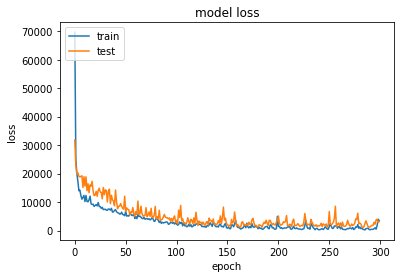

23/23 [==============================] - 0s 562us/step - loss: 3861.5356 - mse: 3861.5356 - mae: 20.8609
       predic   actual
0  121.267258  122.450
1  206.601685  212.330
2  267.920258  265.310
3   10.171981   43.225
4   54.540035   58.290
Mean Squared Error: 3861.5356402556313
Mean Absolute Error: 20.860946247931377


In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.evaluate(X_train_pca, y_train_pca, batch_size=20)
model.evaluate(X_test_pca, y_test_pca, batch_size=20)

y_pred_pca_2 = model.predict(X_test_pca).flatten()
testy_np = y_test_pca.to_numpy()
res_val_pca_2 = []
for p, a in zip(y_pred_pca_2, testy_np):
    res_val_pca_2.append([p, a])
res_pca_2 = pd.DataFrame(res_val_pca_2, columns=["predic", "actual"])
print(res_pca_2.head())

print("Mean Squared Error:", mean_squared_error(y_test_pca, y_pred_pca_2))
print("Mean Absolute Error:", mean_absolute_error(y_test_pca, y_pred_pca_2))

In [10]:
# X_train_pca, X_test_pca, y_train_pca, y_test_pca

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train_pca, y_train_pca)

y_pred_pca_3 = regressor.predict(X_test_pca)

res_val_pca_3 = []
for p, a in zip(y_pred_pca_3, y_test_pca):
    res_val_pca_3.append([p, a])
res_val_pca_3 = pd.DataFrame(res_val_pca_3, columns=["predic", "actual"])
print(res_val_pca_3.head())
print("Mean Squared Error:", mean_squared_error(y_test_pca, y_pred_pca_3))
print("Mean Absolute Error:", mean_absolute_error(y_test_pca, y_pred_pca_3))



   predic   actual
0  128.89  122.450
1  216.18  212.330
2  268.34  265.310
3   19.09   43.225
4   58.29   58.290
Mean Squared Error: 14863.162936998662
Mean Absolute Error: 34.694408460977385


Epoch 1/300
43/43 [==============================] - 0s 3ms/step - loss: 198132.3438 - mse: 198132.3438 - mae: 202.8000 - val_loss: 123873.9688 - val_mse: 123873.9688 - val_mae: 228.9726
Epoch 2/300
43/43 [==============================] - 0s 1ms/step - loss: 92465.6562 - mse: 92465.6562 - mae: 163.2383 - val_loss: 86318.7422 - val_mse: 86318.7422 - val_mae: 147.6874
Epoch 3/300
43/43 [==============================] - 0s 1ms/step - loss: 75087.1328 - mse: 75087.1328 - mae: 134.7332 - val_loss: 78082.4844 - val_mse: 78082.4844 - val_mae: 133.3344
Epoch 4/300
43/43 [==============================] - 0s 1ms/step - loss: 69476.3359 - mse: 69476.3281 - mae: 128.4910 - val_loss: 77539.1016 - val_mse: 77539.1016 - val_mae: 125.6136
Epoch 5/300
43/43 [==============================] - 0s 1ms/step - loss: 60989.6758 - mse: 60989.6758 - mae: 110.4628 - val_loss: 74337.3438 - val_mse: 74337.3438 - val_mae: 134.6435
Epoch 6/300
43/43 [==============================] - 0s 1ms/step - loss: 58036.33

Epoch 46/300
43/43 [==============================] - 0s 1ms/step - loss: 18969.4023 - mse: 18969.4023 - mae: 65.4023 - val_loss: 42433.0625 - val_mse: 42433.0625 - val_mae: 84.4898
Epoch 47/300
43/43 [==============================] - 0s 1ms/step - loss: 24270.8242 - mse: 24270.8242 - mae: 72.3040 - val_loss: 46163.8750 - val_mse: 46163.8750 - val_mae: 84.6833
Epoch 48/300
43/43 [==============================] - 0s 1ms/step - loss: 20684.1973 - mse: 20684.1973 - mae: 63.9654 - val_loss: 31283.0039 - val_mse: 31283.0039 - val_mae: 75.6495
Epoch 49/300
43/43 [==============================] - 0s 1ms/step - loss: 18992.6582 - mse: 18992.6582 - mae: 61.4936 - val_loss: 29240.6953 - val_mse: 29240.6953 - val_mae: 75.4271
Epoch 50/300
43/43 [==============================] - 0s 1ms/step - loss: 18449.7559 - mse: 18449.7559 - mae: 57.5722 - val_loss: 27755.3965 - val_mse: 27755.3965 - val_mae: 68.6214
Epoch 51/300
43/43 [==============================] - 0s 1ms/step - loss: 18156.0117 - mse

43/43 [==============================] - 0s 1ms/step - loss: 13339.3076 - mse: 13339.3076 - mae: 47.5307 - val_loss: 20265.6543 - val_mse: 20265.6543 - val_mae: 65.6524
Epoch 92/300
43/43 [==============================] - 0s 1ms/step - loss: 12190.7070 - mse: 12190.7070 - mae: 43.6763 - val_loss: 21856.7051 - val_mse: 21856.7051 - val_mae: 56.4730
Epoch 93/300
43/43 [==============================] - 0s 1ms/step - loss: 13108.9932 - mse: 13108.9922 - mae: 46.7405 - val_loss: 18170.3086 - val_mse: 18170.3086 - val_mae: 57.4012
Epoch 94/300
43/43 [==============================] - 0s 1ms/step - loss: 13058.5215 - mse: 13058.5215 - mae: 47.1930 - val_loss: 19314.0078 - val_mse: 19314.0078 - val_mae: 58.9723
Epoch 95/300
43/43 [==============================] - 0s 1ms/step - loss: 12553.2217 - mse: 12553.2217 - mae: 47.1583 - val_loss: 19497.0859 - val_mse: 19497.0859 - val_mae: 62.3540
Epoch 96/300
43/43 [==============================] - 0s 1ms/step - loss: 13175.8955 - mse: 13175.8955 

43/43 [==============================] - 0s 1ms/step - loss: 7314.3965 - mse: 7314.3965 - mae: 39.2508 - val_loss: 11716.9473 - val_mse: 11716.9473 - val_mae: 46.2972
Epoch 137/300
43/43 [==============================] - 0s 1ms/step - loss: 10310.0762 - mse: 10310.0762 - mae: 42.8999 - val_loss: 13558.2656 - val_mse: 13558.2656 - val_mae: 51.4803
Epoch 138/300
43/43 [==============================] - 0s 1ms/step - loss: 10668.5996 - mse: 10668.5996 - mae: 45.6423 - val_loss: 14524.4990 - val_mse: 14524.4990 - val_mae: 55.2999
Epoch 139/300
43/43 [==============================] - 0s 1ms/step - loss: 7833.2393 - mse: 7833.2393 - mae: 39.3640 - val_loss: 11187.1230 - val_mse: 11187.1211 - val_mae: 46.2152
Epoch 140/300
43/43 [==============================] - 0s 1ms/step - loss: 8362.4844 - mse: 8362.4844 - mae: 40.7506 - val_loss: 18516.9023 - val_mse: 18516.9023 - val_mae: 60.8490
Epoch 141/300
43/43 [==============================] - 0s 1ms/step - loss: 10743.6035 - mse: 10743.6035 -

43/43 [==============================] - 0s 1ms/step - loss: 8413.5098 - mse: 8413.5098 - mae: 46.2609 - val_loss: 12354.8457 - val_mse: 12354.8457 - val_mae: 48.8574
Epoch 182/300
43/43 [==============================] - 0s 1ms/step - loss: 6055.6245 - mse: 6055.6245 - mae: 34.2004 - val_loss: 8258.1562 - val_mse: 8258.1562 - val_mae: 38.3919
Epoch 183/300
43/43 [==============================] - 0s 1ms/step - loss: 6692.0981 - mse: 6692.0981 - mae: 36.0142 - val_loss: 15158.0605 - val_mse: 15158.0605 - val_mae: 54.3722
Epoch 184/300
43/43 [==============================] - 0s 1ms/step - loss: 4552.6562 - mse: 4552.6562 - mae: 33.2658 - val_loss: 9039.9707 - val_mse: 9039.9717 - val_mae: 40.1289
Epoch 185/300
43/43 [==============================] - 0s 1ms/step - loss: 4776.8018 - mse: 4776.8018 - mae: 28.6497 - val_loss: 8923.1543 - val_mse: 8923.1543 - val_mae: 42.5296
Epoch 186/300
43/43 [==============================] - 0s 1ms/step - loss: 5116.6309 - mse: 5116.6313 - mae: 33.321

Epoch 227/300
43/43 [==============================] - 0s 1ms/step - loss: 4854.0898 - mse: 4854.0898 - mae: 35.8970 - val_loss: 12789.5225 - val_mse: 12789.5225 - val_mae: 43.2219
Epoch 228/300
43/43 [==============================] - 0s 1ms/step - loss: 6287.9399 - mse: 6287.9399 - mae: 35.1578 - val_loss: 10463.5527 - val_mse: 10463.5527 - val_mae: 39.1732
Epoch 229/300
43/43 [==============================] - 0s 1ms/step - loss: 3012.3765 - mse: 3012.3765 - mae: 27.0528 - val_loss: 7766.9351 - val_mse: 7766.9351 - val_mae: 36.9619
Epoch 230/300
43/43 [==============================] - 0s 1ms/step - loss: 3659.7622 - mse: 3659.7622 - mae: 30.6454 - val_loss: 6117.5415 - val_mse: 6117.5415 - val_mae: 38.6609
Epoch 231/300
43/43 [==============================] - 0s 1ms/step - loss: 3210.7791 - mse: 3210.7791 - mae: 27.6960 - val_loss: 5963.0718 - val_mse: 5963.0718 - val_mae: 34.6628
Epoch 232/300
43/43 [==============================] - 0s 1ms/step - loss: 2470.4851 - mse: 2470.4851

Epoch 273/300
43/43 [==============================] - 0s 1ms/step - loss: 1458.3938 - mse: 1458.3938 - mae: 17.8965 - val_loss: 6168.2827 - val_mse: 6168.2827 - val_mae: 33.6116
Epoch 274/300
43/43 [==============================] - 0s 1ms/step - loss: 1758.1063 - mse: 1758.1063 - mae: 18.3600 - val_loss: 6200.1411 - val_mse: 6200.1411 - val_mae: 33.3435
Epoch 275/300
43/43 [==============================] - 0s 1ms/step - loss: 2764.8210 - mse: 2764.8210 - mae: 24.2904 - val_loss: 7708.3472 - val_mse: 7708.3472 - val_mae: 38.8300
Epoch 276/300
43/43 [==============================] - 0s 1ms/step - loss: 1949.4724 - mse: 1949.4724 - mae: 22.8077 - val_loss: 5621.2065 - val_mse: 5621.2065 - val_mae: 33.9176
Epoch 277/300
43/43 [==============================] - 0s 1ms/step - loss: 1673.8661 - mse: 1673.8661 - mae: 20.0076 - val_loss: 5465.2202 - val_mse: 5465.2202 - val_mae: 34.8222
Epoch 278/300
43/43 [==============================] - 0s 1ms/step - loss: 1245.3711 - mse: 1245.3711 - m

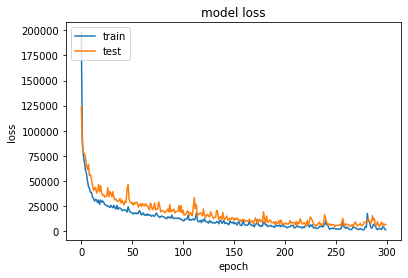

23/23 [==============================] - 0s 585us/step - loss: 13806.2080 - mse: 13806.2090 - mae: 37.8426
       predic  actual
0  163.497559  124.96
1  248.761047  213.59
2  613.915588  531.48
3  161.762939   87.47
4  121.112724  116.84
Mean Squared Error: 13806.211459592338
Mean Absolute Error: 37.8426413266038


In [11]:
# X_train_pca, X_test_pca, y_train_pca, y_test_pca
# NN Model with one dimention
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=Xf_train_pca.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=opt, metrics=['mse', 'mae'])
history = model.fit(Xf_train_pca, yf_train_pca, epochs=300, validation_split=0.2, batch_size=20)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.evaluate(Xf_train_pca, yf_train_pca, batch_size=20)
model.evaluate(Xf_test_pca, yf_test_pca, batch_size=20)

y_pred_pca_2 = model.predict(Xf_test_pca).flatten()
testy_np = yf_test_pca.to_numpy()
res_val_pca_2 = []
for p, a in zip(y_pred_pca_2, testy_np):
    res_val_pca_2.append([p, a])
res_pca_2 = pd.DataFrame(res_val_pca_2, columns=["predic", "actual"])
print(res_pca_2.head())

print("Mean Squared Error:", mean_squared_error(yf_test_pca, y_pred_pca_2))
print("Mean Absolute Error:", mean_absolute_error(yf_test_pca, y_pred_pca_2))

In [12]:
# X_train_pca, X_test_pca, y_train_pca, y_test_pca

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(Xf_train_pca, yf_train_pca)

y_pred_pca_3 = regressor.predict(Xf_test_pca)

res_val_pca_3 = []
for p, a in zip(y_pred_pca_3, yf_test_pca):
    res_val_pca_3.append([p, a])
res_val_pca_3 = pd.DataFrame(res_val_pca_3, columns=["predic", "actual"])
print(res_val_pca_3.head())
print("Mean Squared Error:", mean_squared_error(yf_test_pca, y_pred_pca_3))
print("Mean Absolute Error:", mean_absolute_error(yf_test_pca, y_pred_pca_3))

   predic  actual
0  132.68  124.96
1  217.25  213.59
2  783.20  531.48
3   39.19   87.47
4  116.84  116.84
Mean Squared Error: 43934.90945219123
Mean Absolute Error: 69.03668125455872
